In [1]:
import numpy as np
from random import sample
import matplotlib.pyplot as plt

from sklearn.neighbors import KNeighborsClassifier

import warnings
warnings.filterwarnings("ignore")

In [2]:
N = 50

POP_WHOLE = 40
PERCENTAGE = 0.5
NUM_OF_WANTED_NEIGHBOURS = 20
ITER_NUM = 20

In [3]:
POP_1 = int(POP_WHOLE * PERCENTAGE)
POP_2 = int(POP_WHOLE * (1 - PERCENTAGE))


In [4]:
POP_1, POP_2

(20, 20)

In [5]:
def distance(x1y1, x2y2):
    return sum((x - y) for (x, y) in zip(x1y1, x2y2))

In [6]:
clf = KNeighborsClassifier(n_neighbors=NUM_OF_WANTED_NEIGHBOURS+1,
                           metric='manhattan')
                           # weights='distance')

In [7]:
def get_x1_x2(num):
    return num % N, num // N

In [8]:
class Board():
    def __init__(self, n):
        self.n = n
        self.matrix = np.zeros(n * n).reshape(n, n)
        self.X = []
        self.y = []

        # случайных чисел
        nums = sample(range(n * n), POP_1 + POP_2)
        self.free_nums = set(range(n * n)) - set(nums)

        for num in nums[:POP_1]:
            x1 = num % n
            x2 = num // n
            self.matrix[x1, x2] = 1
            self.X.append([x1, x2])
            self.y.append(1)

        for num in nums[POP_2:]:
            x1 = num % n
            x2 = num // n
            self.matrix[x1, x2] = 2
            self.X.append([x1, x2])
            self.y.append(2)

    def apply_model(self):
        X = self.X
        y = self.y
        clf.fit(X, y)
        y_pred = clf.predict(X)
        # print(*y)
        # print(*y_pred)
        # print()
        for i in range(POP_1 + POP_2):
            x1, x2 = X[i]
            if y[i] != y_pred[i]:

                free = sample(self.free_nums, 1)[0]
                self.free_nums.remove(free)

                # free = self.free_nums.pop()
                self.free_nums.add(x2 * N + x1)
                self.matrix[x1, x2] = 0

                x1, x2 = get_x1_x2(free)
                self.matrix[x1, x2] = y[i]
                X[i] = [x1, x2]

    def cycle(self):
        for i in range(1, ITER_NUM + 1):
            self.apply_model()
            self.show(i)

    def show(self, i):

        # creating a plot
        pixel_plot = plt.figure(figsize=(14,7))

        try:
            pixel_plot.add_axes([1, 1, 0.4, 0.4])
        except Warning as w:
            pass

        # customizing plot
        plt.title(f"pixel_plot_{i}")
        plt.savefig(f'gifs/plot_{i}.png')
        pixel_plot = plt.imshow( self.matrix, cmap='hot',
                                 interpolation='nearest', origin='lower')
        plt.colorbar(pixel_plot)


        # plt.show(pixel_plot)

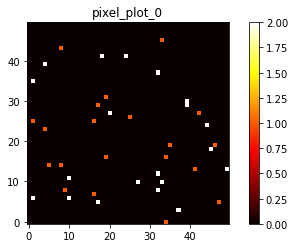

In [9]:
board = Board(N)
board.show(0)

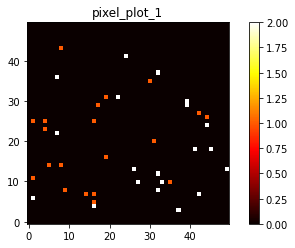

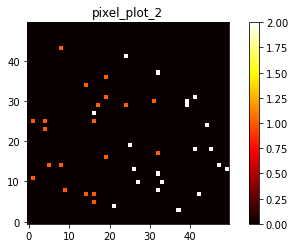

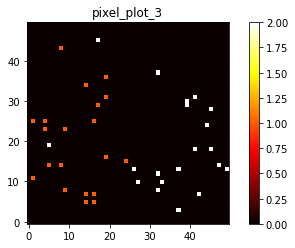

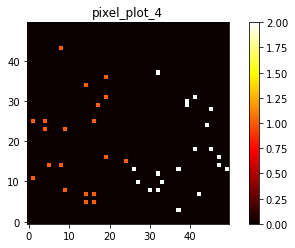

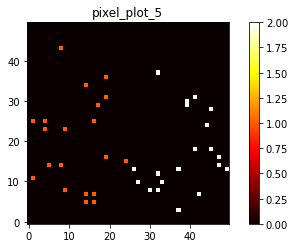

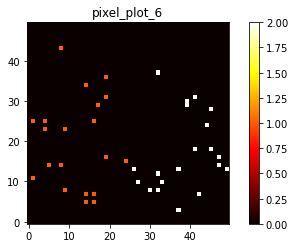

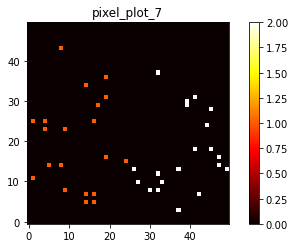

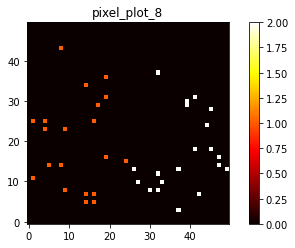

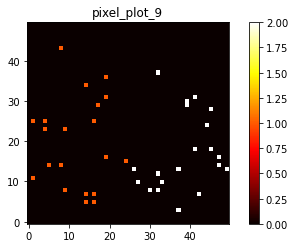

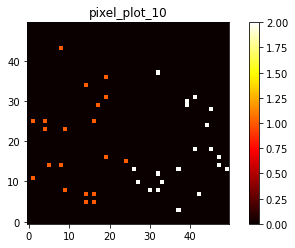

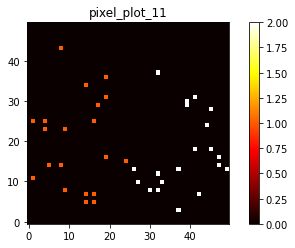

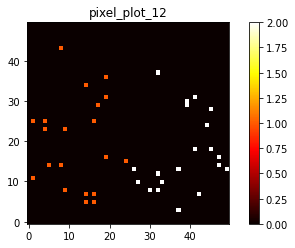

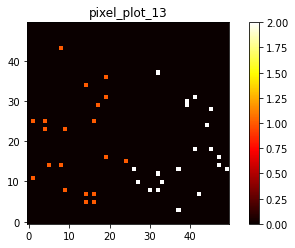

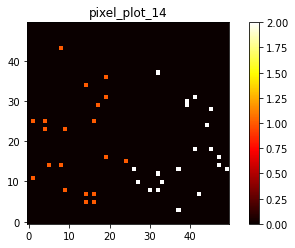

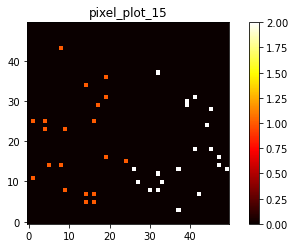

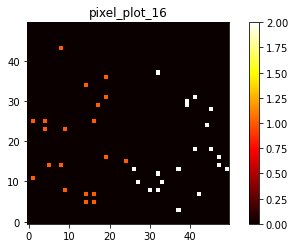

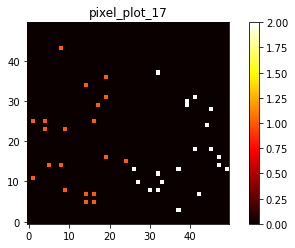

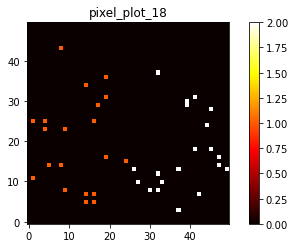

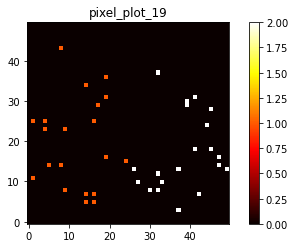

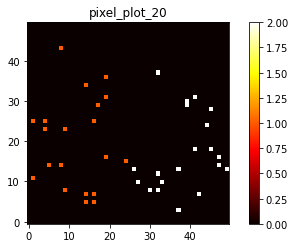

In [10]:
board.cycle()

In [1]:
def make_gif():
    import imageio
    import os

    png_dir = '../pr3task9/gifs'
    images = []
    for file_name in sorted(os.listdir(png_dir)):
        if file_name.endswith('.png'):
            file_path = os.path.join(png_dir, file_name)
            images.append(imageio.imread(file_path))
    imageio.mimsave('../pr3task9/gifs/movie1.gif', images)

In [2]:
make_gif()